# DAT210x - Programming with Python for DS

## Module5- Lab1

Start by importing whatever you need to import in order to make this lab work:

In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.cluster import KMeans

### How to Get The Dataset

1. Open up the City of Chicago's [Open Data | Crimes](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2) page.
1. In the `Primary Type` column, click on the `Menu` button next to the info button, and select `Filter This Column`. It might take a second for the filter option to show up, since it has to load the entire list first.
1. Scroll down to `GAMBLING`
1. Click the light blue `Export` button next to the `Filter` button, and select `Download As CSV`

Now that you have th dataset stored as a CSV, load it up being careful to double check headers, as per usual:

In [11]:
df = pd.read_csv('./Datasets/crimes.csv', index_col=0)
df.head()

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
Case Number,,,,,,,,,,,,,,,,,
HM172874,02/09/2006 10:29:07 PM,075XX S COLFAX AVE,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,421,7.0,19,1194833.0,1855572.0,2006,41.758607,-87.561511,"(41.758607126, -87.561510616)"
HM157167,02/01/2006 12:30:27 PM,038XX W FERDINAND ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,1122,27.0,19,1150871.0,1903067.0,2006,41.889909,-87.721389,"(41.889909247, -87.721389051)"
HM159623,02/02/2006 07:02:12 PM,050XX W SUPERIOR ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,1531,28.0,19,1142605.0,1904502.0,2006,41.894005,-87.751710,"(41.89400481, -87.751710086)"
HM158020,02/01/2006 08:13:00 PM,056XX W WASHINGTON BLVD,1661,GAMBLING,GAME/DICE,RESIDENCE PORCH/HALLWAY,True,False,1512,29.0,19,1138430.0,1900175.0,2006,41.882208,-87.767149,"(41.882207608, -87.767148598)"
HM156984,02/01/2006 10:10:00 AM,015XX W 72ND ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,734,17.0,19,1167231.0,1856980.0,2006,41.763106,-87.662629,"(41.763105901, -87.66262925)"


Get rid of any _rows_ that have nans in them:

In [12]:
df = df.dropna()

In [13]:
df.shape

(13004, 17)

Display the `dtypes` of your dset:

In [16]:
df.dtypes

Date                    datetime64[ns]
Block                           object
IUCR                             int64
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
Ward                           float64
FBI Code                         int64
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

Coerce the `Date` feature (which is currently a string object) into real date, and confirm by displaying the `dtypes` again. This might be a slow executing process...

In [15]:
df['Date'] = pd.to_datetime(df['Date'] , errors='coerce')

In [32]:
def doKMeans(df):
    # Let's plot your data with a '.' marker, a 0.3 alpha at the Longitude,
    # and Latitude locations in your dataset. Longitude = x, Latitude = y
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(df.Longitude, df.Latitude, marker='.', alpha=0.3)

    
    # TODO: Filter `df` using indexing so it only contains Longitude and Latitude,
    # since the remaining columns aren't really applicable for this lab:
    #
    df = df.loc[:,['Longitude','Latitude']]


    # TODO: Use K-Means to try and find seven cluster centers in this df.
    # Be sure to name your kmeans model `model` so that the printing works.
    #
    model = KMeans(n_clusters=7)
    model.fit(df)


    # Now we can print and plot the centroids:
    centroids = model.cluster_centers_
    print(centroids)
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5, linewidths=3, s=169)
    plt.show()

[[-87.75480142  41.88985386]
 [-87.6349544   41.7055019 ]
 [-87.6649696   41.7756854 ]
 [-87.58020176  41.7504627 ]
 [-87.68692804  41.98387683]
 [-87.61916277  41.7917633 ]
 [-87.71061917  41.87537947]]


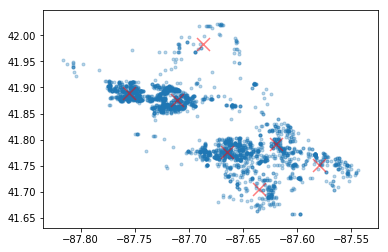

In [39]:
# Print & Plot your data
doKMeans(df)

Filter out the data so that it only contains samples that have a `Date > '2011-01-01'`, using indexing. Then, in a new figure, plot the crime incidents, as well as a new K-Means run's centroids.

In [35]:
df = pd.read_csv('./Datasets/crimes.csv', index_col=0)
df = df.dropna()
df['Date'] = pd.to_datetime(df['Date'] , errors='coerce')

In [37]:
df = df[df['Date']>'2011-01-01']

[[-87.71061917  41.87537947]
 [-87.6349544   41.7055019 ]
 [-87.75480142  41.88985386]
 [-87.61886508  41.79203914]
 [-87.6647826   41.77567273]
 [-87.58020176  41.7504627 ]
 [-87.68692804  41.98387683]]


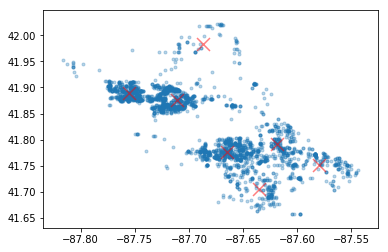

In [43]:
# Print & Plot your data
doKMeans(df)